# Football matches analysis

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [4]:
df_home = pd.read_csv('../data/players_home_matches.csv')
df_away = pd.read_csv('../data/players_away_matches.csv')

In [5]:
col1 = 'team_name'
col2 = 'homeTeamName'

diff_rows = df_home.loc[df_home[col1] != df_home[col2]]
print(diff_rows)

Empty DataFrame
Columns: [Unnamed: 0, awayScore, awayTeamName, awayTeamTacticalSchema, homeScore, homeTeamName, homeTeamTacticalSchema, matchDate, matchWeek, playerName, aerials_lost, aerials_won, aerials_won_pct, age, assisted_shots, assists, ball_recoveries, blocked_passes, blocked_shots, blocked_shots_saves, blocks, cards_red, cards_yellow, cards_yellow_red, carries, carries_into_final_third, carries_into_penalty_area, carry_distance, carry_progressive_distance, clearances, corner_kicks, corner_kicks_in, corner_kicks_out, corner_kicks_straight, crosses, crosses_into_penalty_area, dispossessed, dribble_tackles, dribble_tackles_pct, dribbled_past, dribbles, dribbles_completed, dribbles_completed_pct, dribbles_vs, errors, fouled, fouls, gca, goals, interceptions, minutes, miscontrols, npxg, nutmegs, offsides, own_goals, pass_targets, passes, passes_blocked, passes_completed, passes_completed_long, passes_completed_medium, passes_completed_short, passes_dead, passes_free_kicks, passes_g

In [6]:
cols_to_move = ['championship_name', 'matchWeek', 'matchDate', 'homeTeamName', 'awayTeamName',
                'homeScore', 'awayScore', 'homeTeamTacticalSchema', 'awayTeamTacticalSchema', 'team_name', 'playerName']
cols_to_delete = ['Unnamed: 0']

In [7]:
new_col_order = cols_to_move + [col for col in df_home.columns if col not in cols_to_move + cols_to_delete]
df_home = df_home[new_col_order]
df_away = df_away[new_col_order]

In [37]:
df_away

,championship_name,matchWeek,matchDate,homeTeamName,awayTeamName,homeScore,awayScore,homeTeamTacticalSchema,awayTeamTacticalSchema,team_name,...,throw_ins,touches,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg
0,ligue 1,1,2021-08-08,Nice,Reims,0,0,(4-4-2),(3-4-1-2),Nice,...,0.0,58.0,3.0,1.0,37.0,8.0,57.0,27.0,0.0,0.0
1,ligue 1,1,2021-08-08,Nice,Reims,0,0,(4-4-2),(3-4-1-2),Nice,...,14.0,61.0,19.0,0.0,21.0,2.0,47.0,28.0,0.0,0.0
2,ligue 1,1,2021-08-08,Nice,Reims,0,0,(4-4-2),(3-4-1-2),Nice,...,0.0,19.0,8.0,2.0,4.0,1.0,19.0,7.0,0.1,0.0
3,ligue 1,1,2021-08-08,Nice,Reims,0,0,(4-4-2),(3-4-1-2),Nice,...,0.0,28.0,2.0,0.0,8.0,3.0,28.0,18.0,0.0,0.0
4,ligue 1,1,2021-08-08,Nice,Reims,0,0,(4-4-2),(3-4-1-2),Nice,...,0.0,27.0,7.0,1.0,9.0,1.0,22.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76180,premier league,11,2020-12-06,West Bromwich Albion,Crystal Palace,1,5,(3-4-1-2),(4-4-2),West Bromwich Albion,...,0.0,32.0,22.0,5.0,2.0,2.0,32.0,10.0,0.1,0.7
76181,premier league,29,2021-03-04,West Bromwich Albion,Everton,0,1,(4-1-4-1),(3-4-1-2),West Bromwich Albion,...,0.0,66.0,25.0,2.0,6.0,1.0,65.0,40.0,0.0,0.0
76182,premier league,37,2021-05-19,West Bromwich Albion,West Ham United,1,3,(4-4-1-1),(4-2-3-1),West Bromwich Albion,...,1.0,34.0,1.0,1.0,25.0,10.0,32.0,10.0,0.0,0.0
76183,premier league,37,2021-05-19,West Bromwich Albion,West Ham United,1,3,(4-4-1-1),(4-2-3-1),West Bromwich Albion,...,0.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0


In [39]:
df_home.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76215 entries, 0 to 76214
Data columns (total 126 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    championship_name            object 
 1    matchWeek                    int64  
 2    matchDate                    object 
 3    homeTeamName                 object 
 4    awayTeamName                 object 
 5    homeScore                    int64  
 6    awayScore                    int64  
 7    homeTeamTacticalSchema       object 
 8    awayTeamTacticalSchema       object 
 9    team_name                    object 
 10   playerName                   object 
 11   aerials_lost                 float64
 12   aerials_won                  float64
 13   aerials_won_pct              float64
 14   age                          float64
 15   assisted_shots               float64
 16   assists                      int64  
 17   ball_recoveries              float64
 18   blocked_passes          

In [41]:
pd.set_option('display.max_rows', None)
print(df_home.isnull().sum())
pd.reset_option('display.max_rows')

championship_name                664
matchWeek                          0
matchDate                          0
homeTeamName                       0
awayTeamName                       0
homeScore                          0
awayScore                          0
homeTeamTacticalSchema             0
awayTeamTacticalSchema             0
team_name                          0
playerName                         0
aerials_lost                      73
aerials_won                       73
aerials_won_pct                22870
age                                0
assisted_shots                    73
assists                            0
ball_recoveries                   73
blocked_passes                    73
blocked_shots                     73
blocked_shots_saves               73
blocks                            73
cards_red                          0
cards_yellow                       0
cards_yellow_red                   0
carries                           73
carries_into_final_third         101
c

We can see that in a lot of the columns NULL count is 73 so there are probably rows which does not contain any useful information, so we can probably delete them later on

There are also columns where the NULL count is so big that we might delete them completely

### Our dataset consists of 126 columns where 128 are numeric and 8 are not 

### Not numeric columns are:
- championship_name 
- matchDate 
- homeTeamName                  
- awayTeamName 
- homeTeamTacticalSchema        
- awayTeamTacticalSchema        
- team_name                     
- playerName                    

### The rest of columns which are numeric mostly describe various match statistics for each individual player from the home and away team

### We decided to group these columns into a couple of categories:
- Offensive statistics
    - goals
    - assists
    - shots_total
    - shots_on_target
    - xg (oczekiwane gole)
    - xa (oczekiwane asysty)
    - gca (wielokrotne zdarzenia przyczyniające się do celnej akcji)
    - sca (wielokrotne zdarzenia przyczyniające się do strzału)
    - .................................
    - assisted_shots
    - carries
    - carries_into_final_third
    - carries_into_penalty_area
    - carry_distance
    - carry_progressive_distance
    - progressive_carries
    - dispossessed
    - dribble_tackles
    - dribble_tackles_pct
    - dribbled_past
    - errors
    - miscontrols
    - own_goals
    - pens_att
    - pens_conceded
    - pens_made
    - pens_won
    - players_dribbled_past
    - through_balls
    - corner_kicks
    - corner_kicks_in
    - corner_kicks_out
    - corner_kicks_straight
    - throw_ins

- Defensive statistics
    - interceptions
    - tackles
    - tackles_won
    - pressure_regains
    - pressures
    - ball_recoveries
    - blocks
    - blocked_shots
    - blocked_passes
    - clearances
    - .................
    - tackles_att_3rd
    - tackles_def_3rd
    - tackles_interceptions
    - tackles_mid_3rd
    - touches_att_3rd
    - touches_att_pen_area
    - touches_def_3rd
    - touches_def_pen_area
    - touches_live_ball
    - touches_mid_3rd
    - pressures_att_3rd
    - pressures_def_3rd
    - pressures_mid_3rd
- Passes statistics
    - passes
    - passes_completed
    - passes_pct (procentowa skuteczność podań)
    - passes_progressive_distance (odległość postępujących podań)
    - passes_received (odebrane podania)
    - passes_received_pct (procentowa skuteczność odebranych podań)
    - passes_into_final_third
    - passes_into_penalty_area
    - progressive_passes (postępujące podania)
    - progressive_passes_received (odebrane postępujące podania)
    - ...........................................
    - passes_blocked
    - passes_completed_long
    - passes_completed_medium
    - passes_completed_short
    - passes_dead
    - passes_free_kicks
    - passes_ground
    - passes_head
    - passes_high
    - passes_intercepted
    - passes_left_foot
    - passes_live
    - passes_long
    - passes_low
    - passes_medium
    - passes_offsides
    - passes_oob
    - passes_other_body
    - passes_pct_long
    - passes_pct_medium
    - passes_pct_short
    - passes_pressure
    - passes_switches
    - passes_total_distance
- Dribble statistics
    - dribbles
    - dribbles_completed
    - dribbles_completed_pct
    - dribbles_vs
- Physical stats
    - aerials_lost
    - aerials_won
    - aerials_won_pct
    - fouled
    - fouls
    - nutmegs
    - offsides
- Other
    - age
    - minutes
    - matchWeek
    - homeScore
    - awayScore

#### Now we will try to pick some columns which might seem important and perform some visualisations on them

In [35]:
important_cols = [
    ('attack', ['goals', 'assists', 'shots_total', 'shots_on_target', 'xg', 'xa', 'gca', 'sca', 'carries']),
    ('defense', ['interceptions', 'ball_recoveries', 'blocks', 'blocked_shots', 'blocked_passes', 'clearances']),
    ('passing', ['passes', 'passes_completed', 'passes_pct', 'passes_total_distance']),
    ('dribbling', ['dribbles', 'dribbles_completed', 'dribbles_completed_pct']),
    ('physical', ['aerials_lost', 'aerials_won', 'fouls', 'fouled']),
    ('other', ['age', 'minutes', 'homeScore', 'awayScore'])
]

In [51]:
def plot_integer_hist(df, column, ax):
    bins = np.arange(df[column].min(), df[column].max() + 1.5) - 0.5
    sns.histplot(df[column], bins=bins, ax=ax)

    has_fractional_values = any(df[column] % 1 != 0)
    if not has_fractional_values:
        ax.set_xticks(bins + 0.5)

In [52]:
def plot_float_hist(df, column, ax):
    sns.histplot(df[column], ax=ax)

In [59]:
def create_subplots(df, columns, rows, cols, figsize=(15, 10), title=None):
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.flatten()
    for i, col in enumerate(columns):
        plot_integer_hist(df, col, axs[i])
    if title:
        plt.suptitle(title, fontsize=20)
    plt.tight_layout()

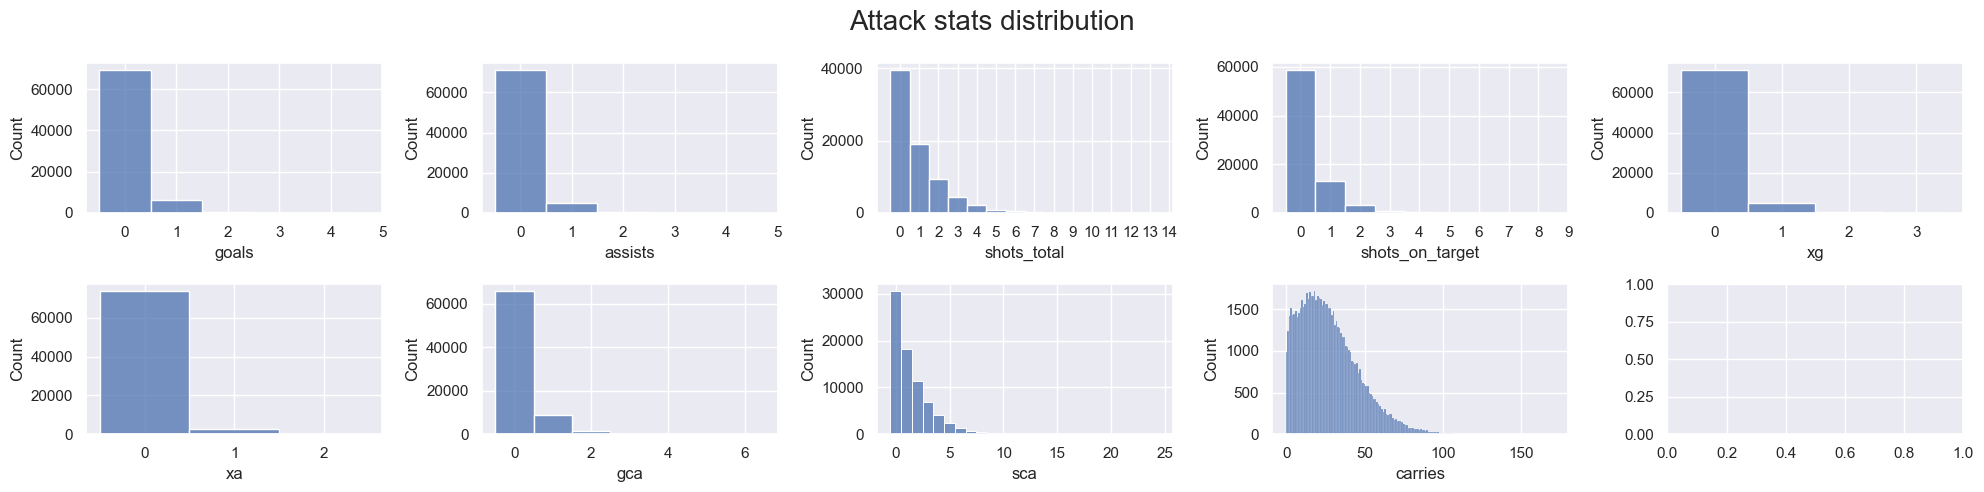

In [61]:
create_subplots(df_home, important_cols[0][1], 2, 5, figsize=(20, 5), title='Attack stats distribution')

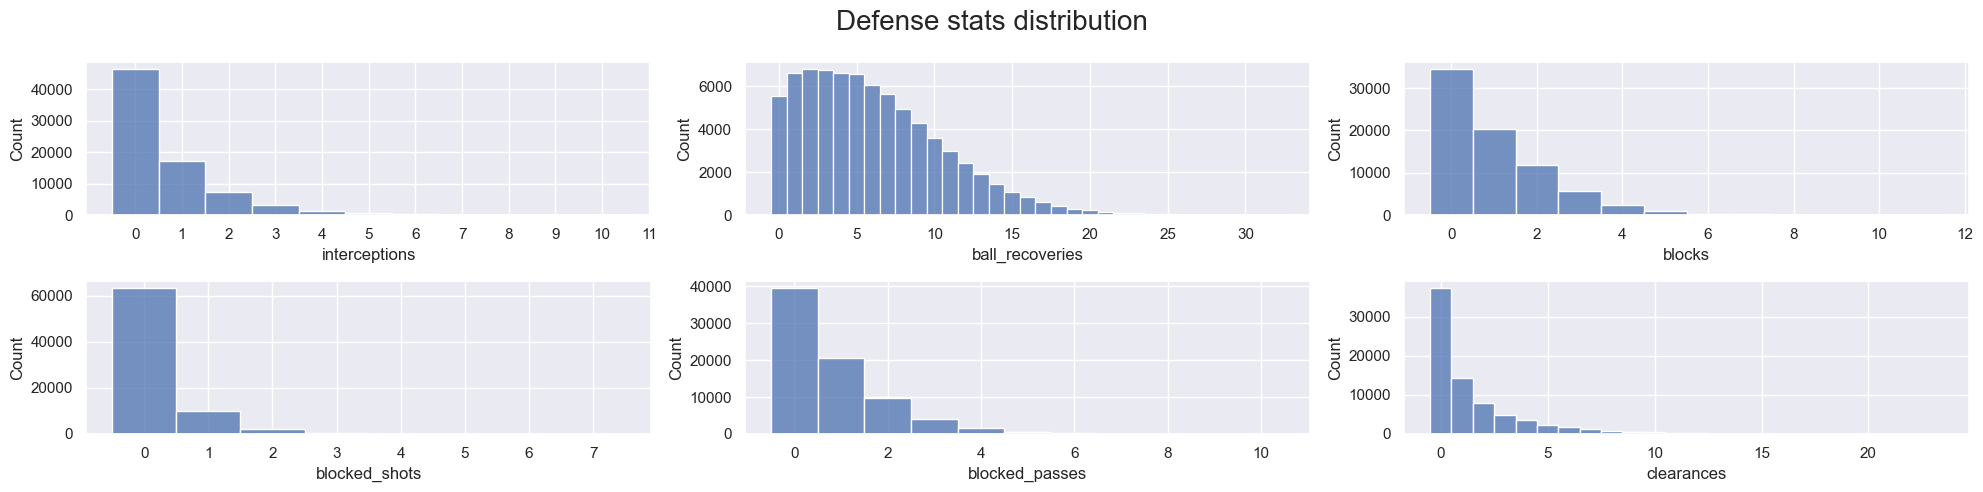

In [62]:
create_subplots(df_home, important_cols[1][1], 2, 3, figsize=(20, 5), title='Defense stats distribution')

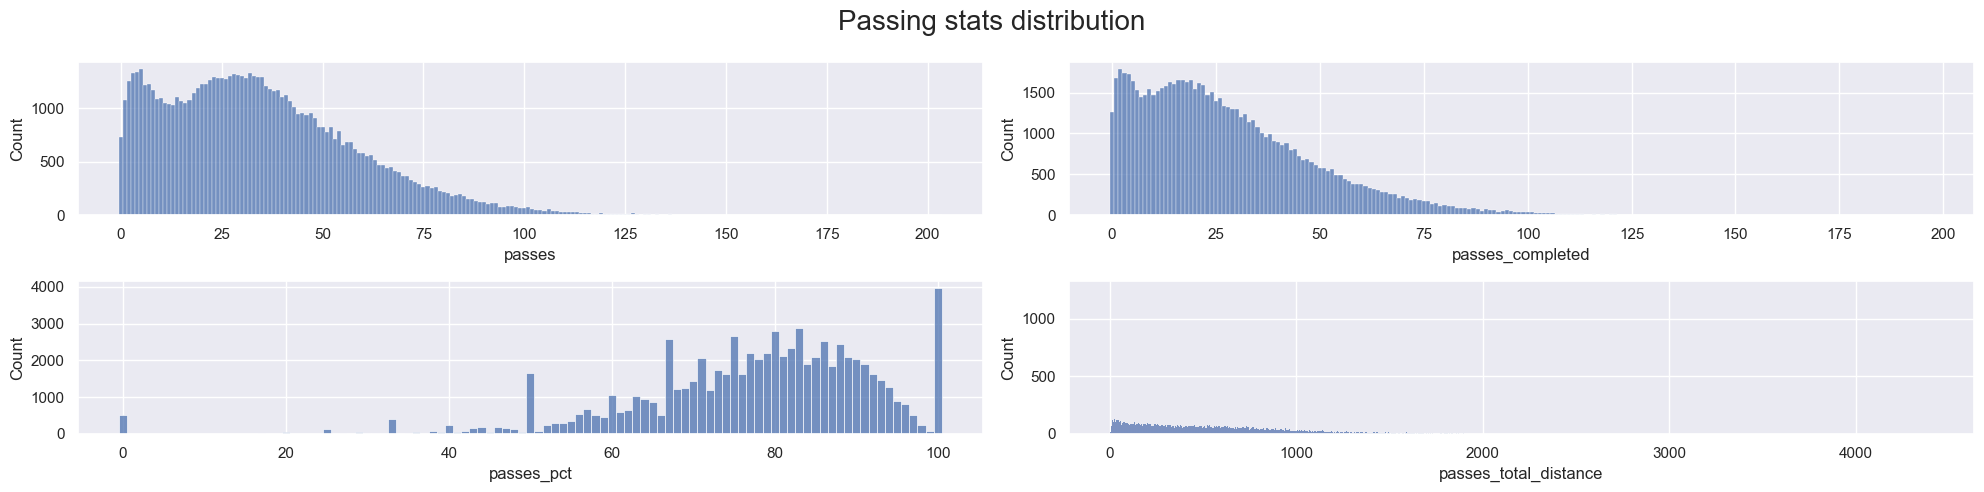

In [66]:
create_subplots(df_home, important_cols[2][1], 2, 2, figsize=(20, 5), title='Passing stats distribution')

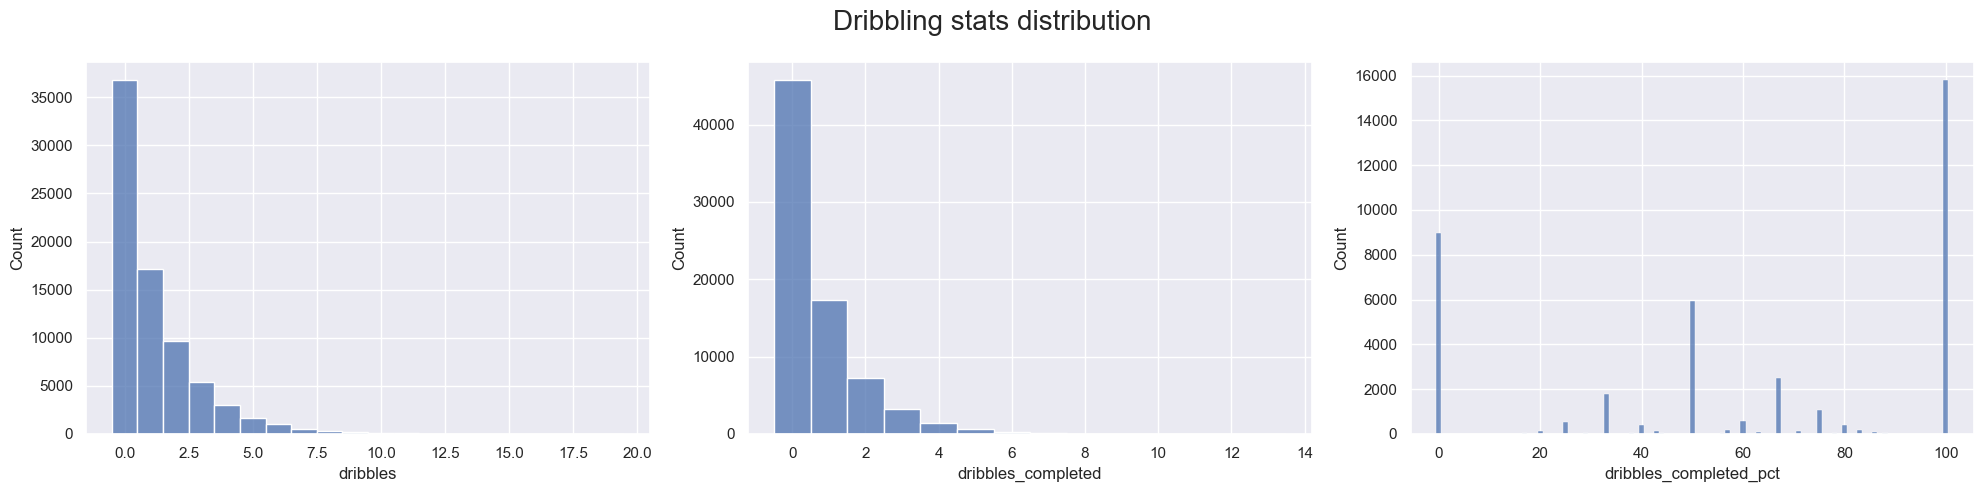

In [68]:
create_subplots(df_home, important_cols[3][1], 1, 3, figsize=(20, 5), title='Dribbling stats distribution')

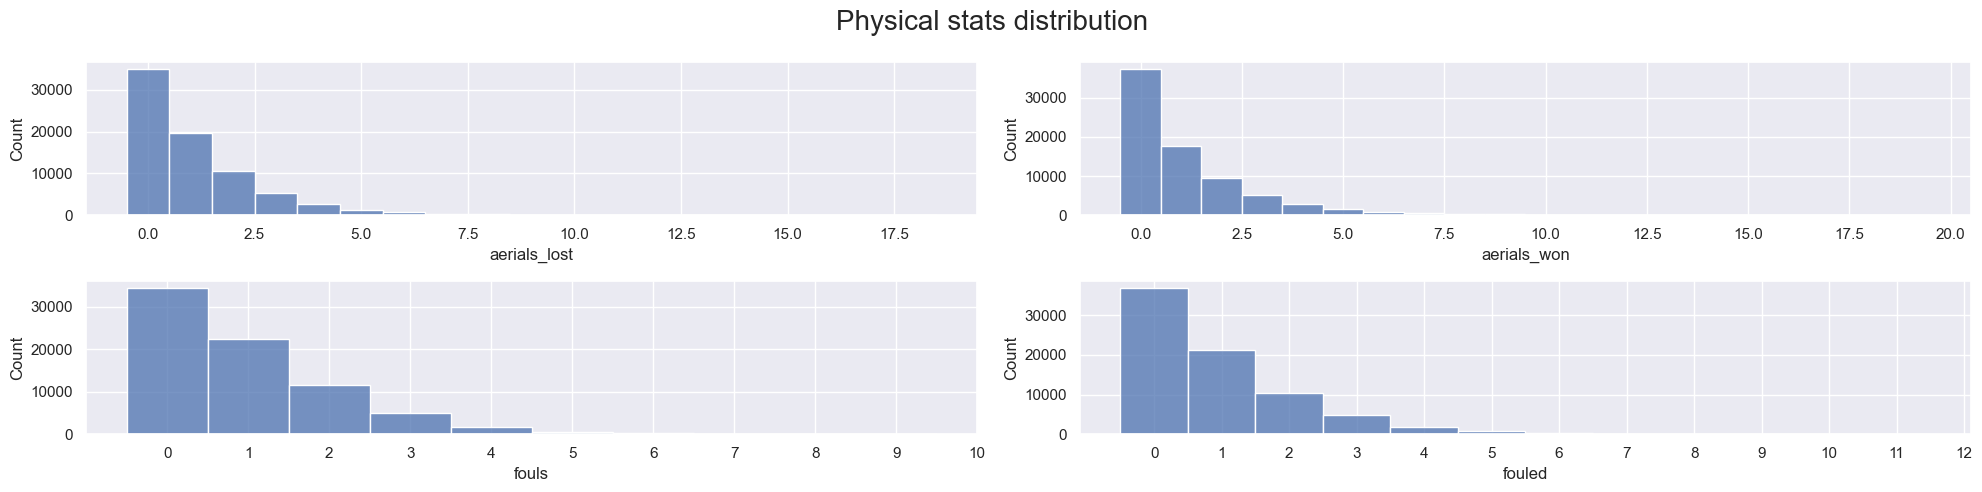

In [69]:
create_subplots(df_home, important_cols[4][1], 2, 2, figsize=(20, 5), title='Physical stats distribution')

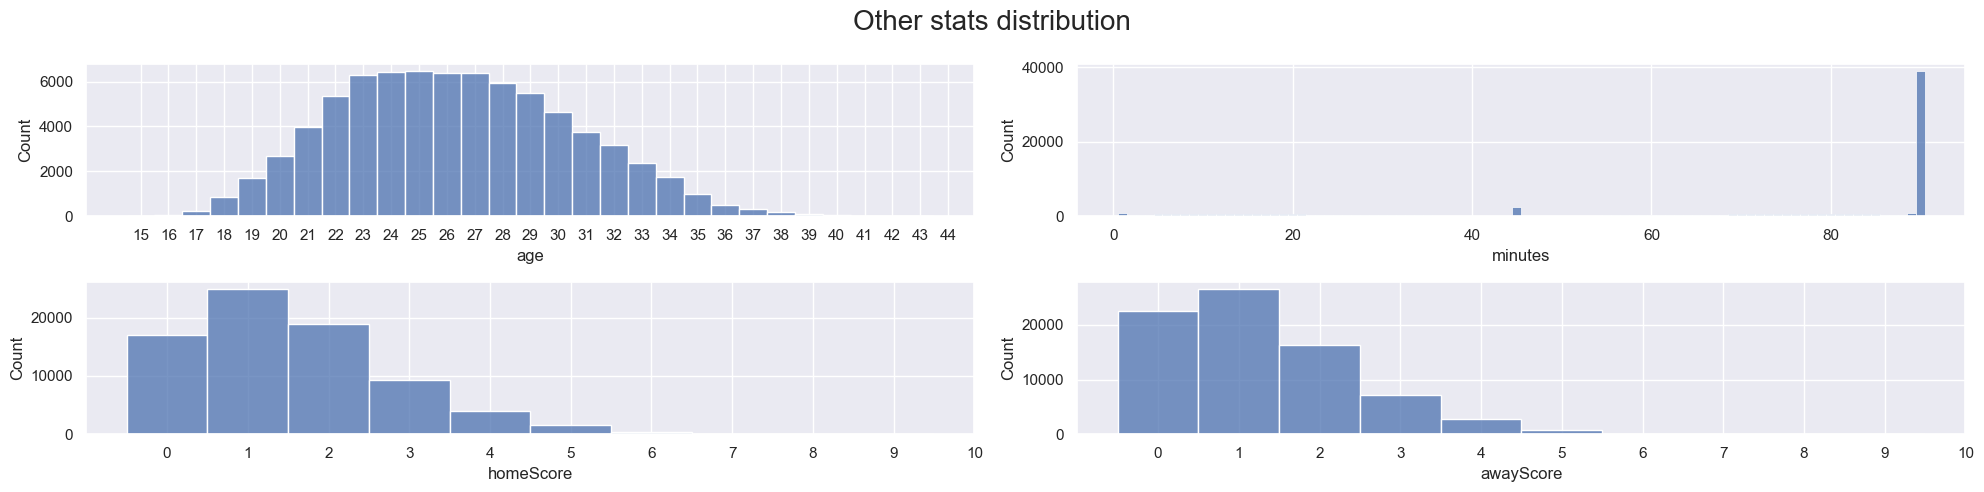

In [70]:
create_subplots(df_home, important_cols[5][1], 2, 2, figsize=(20, 5), title='Other stats distribution')